In [1]:
# Import libraries
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [2]:
sqrt_exp = 0.6 #Exponent of the funding in voting power function
mulp_exp = 0.33 #Exponent of the soft_cap multiplation term in voting power function

In [3]:
def root(x):
    return (x**sqrt_exp)

In [4]:
def getDZ(x, mulp): ## Gets the point at which f(funds)= voting power no longer returns voting power> funds
    y = x-1
    while x-y > 0.001:
        x = y
        y = root(x)*mulp
    print(f'Danger zone ends at: {y}')
    return(y)

In [5]:
def root_plot(softcap):
    ### Plots the root function for a fixed softcap, taking the softcap as maximum.
    
    # Determine multiplication factor from softcap
    mulp = softcap**mulp_exp
    
    # Creating vectors Funding and Voting
    funding = np.linspace(0, softcap, 10000)
    voting = root(funding)*mulp
    
    #Get Danger zone and plot it in the graph
    dz = getDZ(softcap,mulp)
    x1, y1 = [dz, dz], [0, dz]
    x2, y2 = [0, dz], [dz, dz]
    plt.plot(x1, y1, x2, y2, color='red')

    # Create the plot funding and voting vector
    plt.plot(funding, voting)
    
    # Label Axes
    plt.xticks(fontsize=12)
    plt. yticks(fontsize=12)
    plt.xlabel(f"Funding above Softcap, Softcap = {softcap}",fontsize=16)
    plt.ylabel("Voting Power",fontsize=16)
    print(f"Multiplication factor:{mulp}")
    
    # Show the plot
    plt.show()

Danger zone ends at: 1995.263499845614
Multiplication factor:20.892961308540396


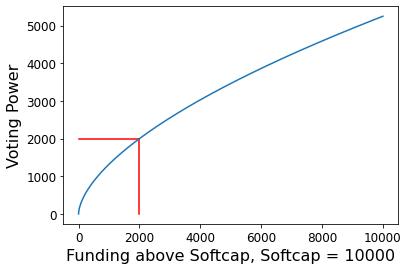

In [6]:
root_plot(10000)

In [18]:
def surface_plot(fund_range, soft_cap):

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    #Label axes
    ax.set_xlabel('Funding above Softcap', fontsize=16, labelpad=10)
    ax.set_ylabel('Softcap', fontsize=16, labelpad=10)
    ax.set_zlabel('Voting Power', fontsize=16, labelpad=10)

    # Make data.
    #danger_zone = getDZ(fund_range, soft_cap**0.3)
    X = np.arange(0, fund_range, 100)
    Y = np.arange(0, soft_cap, 100)
    X, Y = np.meshgrid(X, Y)
    Z = X**sqrt_exp * Y**mulp_exp

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, fund_range/2)
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='z', nbins=2)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.2)

    plt.show()

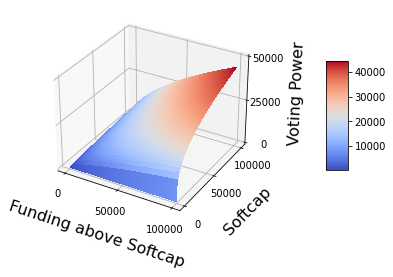

In [19]:
surface_plot(100000,100000)

In [9]:
def percentage_plot(fund_range, soft_cap):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    #Label axes
    ax.set_xlabel('Funding above Softcap', fontsize=16, labelpad=10)
    ax.set_ylabel('Softcap', fontsize=16, labelpad=10)
    ax.set_zlabel('Voting Power as %funding', fontsize=14, labelpad=10)
    
    # Make data.
    danger_zone = getDZ(fund_range, soft_cap**0.3)
    X = np.arange(danger_zone+ fund_range/10, fund_range, 100)
    Y = np.arange(danger_zone+ soft_cap/10, soft_cap, 100)
    X, Y = np.meshgrid(X, Y)
    Z = ((X**sqrt_exp * Y**mulp_exp)/X)*100

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the axes.
    ax.set_zlim(0, 100)
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='z', nbins=2)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.2)

    plt.show()

Danger zone ends at: 5623.4145400470115


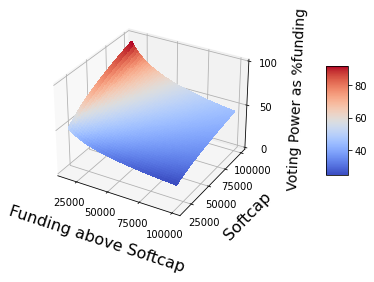

In [10]:
percentage_plot(100000,100000)

Danger zone ends at: 31622.777728237317


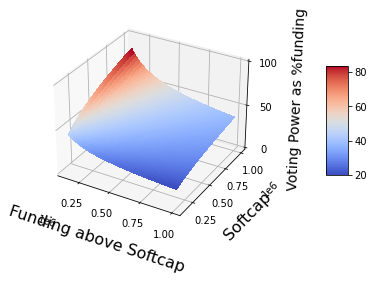

In [11]:
percentage_plot(1000000,1000000)